In [1]:
import numpy as np
import pandas as pd
import os
import PIL, PIL.Image
import base64
import io, math

import matplotlib as mpl
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None  # default='warn'

In [74]:
# ascii_characters_by_surface = "`^\",:;Il!i~+_-?][}{1)(|\\/tfjrxnuvczXYUJCLQ0OZmwqpdbkhao*#MW&8%B@$"

ascii_characters_by_surface = ''.join(["@", "#", "S", "%", "?", "*", "+", ";", ":", ",", "."])

def convert_to_ascii_art(image, h, w):
    ascii_art = []
    image = image.resize((h, w))
    (width, height) = image.size
    for y in range(0, height - 1):
        line = ''
        for x in range(0, width - 1):
            px = image.getpixel((x, y))
            line += convert_pixel_to_character(px)
        ascii_art.append(line)
    return ascii_art


def convert_pixel_to_character(pixel):
    (r, g, b, a) = pixel
    pixel_brightness = r + g + b
    max_brightness = 255 * 3
    brightness_weight = len(ascii_characters_by_surface) / max_brightness
    index = int(pixel_brightness * brightness_weight) - 1
    return ascii_characters_by_surface[index]

In [75]:
emoji_data = pd.read_csv('./emoji/full_emoji.csv')

In [76]:
emoji_data.head()


,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,Samsung,Gmail,SoftBank,DoCoMo,KDDI
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAPAKIFAJh3AP/z...",NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIFAF5LAP/z...","data:image/png;base64,R0lGODlhDwAPAKIAAP///wAA...","data:image/png;base64,R0lGODlhDAAMAIABAMxm////...","data:image/png;base64,R0lGODlhDgAPALMJAP//mf/M..."
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAF5LAJh3...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...",NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhDAAMAKIGAIoAAf/v...","data:image/png;base64,R0lGODlhDwAPAHcAMSH+GlNv...","data:image/png;base64,R0lGODlhDAAMAIABAP+ZAP//...","data:image/png;base64,R0lGODlhDgAPALMIAJmZmf//..."
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,R0lGODlhEAAMAKIFAF5LAP/z...",NaN,"data:image/png;base64,R0lGODlhDAAMAIABAMxm////...",NaN


In [143]:
base64_decoded = base64.b64decode(emoji_data['Apple'][333].split(',')[-1])


In [119]:
base64_decoded

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00H\x00\x00\x00H\x08\x03\x00\x00\x00b3Cu\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00{PLTEGpL\xc5\x868\xcf\x8e;\xfd\xd4l\xc4\x837\xc6\x856\xfe\xdas\xd0\x8f<\xcf\x92>\xe6\xacM\xf9\xc8`\xfc\xd3j\xfb\xc8^\xf9\xc3Z\xadm,\xff\xe0{\xfe\xdau\xc9\x889\xfb\xd3n\xff\xe6\x82\xe0\x9a>\xfe\xb7F\xf1\xbaW\xd7\x95>\xf8\xcbg\xa8d)\xfa\xc4\\\xe7\xa4D\xeb\xb1R\x9dY$\xc2|1\xf0\xacF\xdb\x8a1\xb0p/\xb7m)\xdc\xa2J\xb9y4\xcd~-\x94N\x1f\xed\xc1b\xe0\xadTG\xf8AU\x00\x00\x00\x0ftRNS\x00\xa3y\xd4\xceV\xe7\xfd\x183\x80\x9e^\xb9p3`\xf3\xb2\x00\x00\x06\x98IDATX\xc3\xedWkw\xda:\x10\x04\x02\x08\x03AO$\xd9\x92e\xfc\x00\xfb\xff\xff\xc2;+\x9b$m\xd3{\xd3~\xbc\'\xdb\x9e\xf4\xd4\xc1\xe3\x9d\xd9\xd9\x91Y\xad\xbe\xeb\xbb\xbe\xeb\xffT\x07T\x91\xebp\xf8K\x84\xe2|>\x9e^_P{*\xfc{:\x1d\xcf\xc5\xe1\x8f\xba\x00\xc4\xcb^\x08\xce5\xf71N16^kU)%\xf6/\xa7\xe3\x17\xb1\x8a\xf3\xe9E)oc\xf4\x9csaeWv\xf7(\xb4M\xc9\x85&\x02\xf1\xf5+\xcd\x1c_\

In [144]:
image = PIL.Image.open(io.BytesIO(base64_decoded)).convert('RGBA')
image.width

resized = image.resize((32, 32))

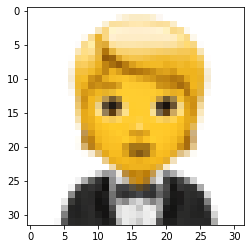

In [145]:
plt.imshow(resized)


In [146]:
test = convert_to_ascii_art(image, 60, 30)

In [147]:
for line in test:
    print(line)

...........................................................
.......................S?**+++++++**??.....................
....................%*+;;::::::::::::;;+*?S................
.................@??*;,,,,,,,::,,,,,,,,:;;+*?..............
...............?+;+*?+:::::::::::::::::::::;+*%............
..............*+;::+%?+;;;;::::;;;;;;;;;;;;;;+**...........
.............*+;;;;+?S%?*++++++++++++++++++++++*?..........
.............*+;+++*?SSSS%?**********************S.........
............?*++++**?%??%%SS%%????*****?*********%.........
............%*+***????*******???%%%%%%?%%??*****??.........
............%****%%??????*+++++++***?%%?%%S%****??.........
............%?**??**?****+++++++++++****?**%%***?*.........
.............???%*****?%S*++++++++++*?S%****%%*??..........
.............**??**;+@#@.#+;++++++;*@#..S;+*?%*?*..........
.............?**?*+;;?##%*:;++++++:;S##%*:;*?%**...........
.............%**?***+++++;++++++++++;+++++**??**...........
..............*???****++++++*+;+++++++++

In [111]:
for line in test:
    print(line)

..%???S............%?*??S..............................*;+%
#?*???#............%??***?.????%.............?***%.....*;:*
%*?#.............@*+*???**??*+*%............#?*+*%......?++
%????????%..**...?+;+*.#?**%?*?@.............#?**#%?%@.#?**
.%???????S?++++S%%%**%..%?**S...................%??????????
...%?%??%@%*++*%?%%%%%%S.%**%..%?S......S%%@...#%*?S;??*?#.
.%?????.....%%S?*??%?%%%%%?*?.?***%...@?????%%..S%%%S......
.%??%??????%.#%****?%%%????**S%**?%...S*++??%????%%%%......
..S????????%S%?*****?%%?*??***?%@.....S*;;*...%?????S......
..........??%?********?**??+**+**?S...@*;:+................
........???S%*****???****%?***++++*?%..?+;+................
.......???S%?***??*******??++++++++++*?@%?%....#%%??????***
.......?%.S?*****?********+**++++++++++**%???******++++++++
.........S?**???************++++++++++*********+++*********
....*?S.#%**?????************+++******?*****?*?@...........
...?*?%#?****??????*********++++++*??****+++*%.............
...??%S%****?*****??**+++*++++++;;;;+***

In [149]:
# print(emoji_data.columns[4:])

emoji_type = list(emoji_data.columns[4:])

emoji_type

['Apple',
 'Google',
 'Facebook',
 'Windows',
 'Twitter',
 'JoyPixels',
 'Samsung',
 'Gmail',
 'SoftBank',
 'DoCoMo',
 'KDDI']

In [150]:
data = []
for row in range(emoji_data.shape[0]):
    entry = emoji_data.iloc[row]
    # print(entry)
    # print(emoji_type)
    for company in emoji_type:
        # print(company)
        # print(entry[company])
        try:
            decoded = base64.b64decode(entry[company].split(',')[-1])
            img = PIL.Image.open(io.BytesIO(decoded)).convert("RGBA")

            ASCII = convert_to_ascii_art(img, 60, 30)
            # print(ASCII)
            entry[company + "_ASCII"] = '\n'.join(ASCII)
        except:
            entry[company + "_ASCII"] = math.nan
    data.append(entry)


# print(data)

df = pd.DataFrame(data)

df.head()
df.shape

# print(test2.iloc[0]['Twitter_ASCII'])





(1816, 26)

In [151]:
df.head()

,#,emoji,unicode,name,Apple,Google,Facebook,Windows,Twitter,JoyPixels,...,Google_ASCII,Facebook_ASCII,Windows_ASCII,Twitter_ASCII,JoyPixels_ASCII,Samsung_ASCII,Gmail_ASCII,SoftBank_ASCII,DoCoMo_ASCII,KDDI_ASCII
0,1,😀,U+1F600,grinning face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,.................................................,........................S??******??S.............,.................................................,..................++++++++++++++++++++++++.......,.........................+++++++++*..............,.................................................,.................................................,NaN,NaN,NaN
1,2,😃,U+1F603,grinning face with big eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,.................................................,........................S?*?****?*?S.............,.................................................,..................++++++++++++++++++++++++.......,.........................+++++++++*..............,.................................................,...???????????????????????????????????????????...,.................................................,.................................................,.................................................
2,3,😄,U+1F604,grinning face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,.................................................,........................S**********S.............,.................................................,..................++++++++++++++++++++++++.......,.........................+++++++++*..............,.................................................,...???????????????????????????????????????????...,;;;;;;;;::::::::;;;;;;;;;;;;;;;;;;;;;;;;;;;;::...,NaN,NaN
3,4,😁,U+1F601,beaming face with smiling eyes,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,.................................................,........................S**********S.............,.................................................,..................++++++++++++++++++++++++.......,.........................+++++++++*..............,.................................................,...???????????????????????????????????????????...,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;::...,.................................................,.................................................
4,5,😆,U+1F606,grinning squinting face,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",...,.................................................,........................S?********?S.............,.................................................,..................++++++++++++++++++++++++.......,.........................+++++++++*.....

In [152]:
df.to_csv("full_emoji_parsed.csv")

In [51]:
t2 = pd.read_csv("full_emoji_parsed.csv")

t2.shape

(1816, 27)